<a href="https://colab.research.google.com/github/ping-Mel/ERV-V2-Assignments/blob/main/session8/s8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Models:
    """
    In this class, we organize our neural network architectures as nested/inner classes.
    This approach groups related functionalities and creates an organized and encapsulated
    code structure. Each neural network architecture is defined as an inner class within
    this Models class. This allows for easy instantiation and clear hierarchy of neural
    network models, each with its distinct architecture and characteristics.
    """
    @staticmethod
    def evaluate_model(model_class, input_size=(3, 32, 32)):
        """
        Static method to evaluate the model architecture.
        This method will print a summary of the model showing the layers and parameters.

        Parameters:
        model_class (class): The inner class representing the neural network architecture to evaluate.
        input_size (tuple): The size of the input to the model. Default is (1, 28, 28) for MNIST dataset.
        """
        # Check for CUDA availability and set the device accordingly
        use_cuda = torch.cuda.is_available()
        device = torch.device("cuda" if use_cuda else "cpu")

        # Initialize the model from the inner class and move to the appropriate device
        model = model_class().to(device)

        # Print the summary of the model
        summary(model, input_size=input_size)



    class NetA(nn.Module):
        """
        Inner class representing an initial neural network architecture.
        """
        def __init__(self):
            super(Models.NetA, self).__init__()
            # Convolutional layers
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 1     32     1   1    3      30     1    0  3
            self.convblock1 = nn.Sequential(
              nn.Conv2d(3, 32, 3),
              nn.BatchNorm2d(32),
              nn.ReLU(),
              nn.Dropout(0.1)
            )

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 3     30    1    1    5      30     1    1  3
            self.convblock2 = nn.Sequential(
              nn.Conv2d(32, 16, 3,padding=1),
              nn.BatchNorm2d(16),
              nn.ReLU(),
              nn.Dropout(0.1)
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 5      30    1   1    5      30     1    0  1
            self.convblock3 = nn.Sequential(
              nn.Conv2d(16, 16, kernel_size=1),
              nn.BatchNorm2d(16),
              nn.ReLU(),
              nn.Dropout(0.1)
            )

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 5     30    1    2    6      15     2    0  2
            self.pool1 = nn.MaxPool2d(2, 2)

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            #  6    15     2   1    10     15     2   1  3
            self.convblock4 = nn.Sequential(
              nn.Conv2d(16, 16, 3,padding=1),
              nn.BatchNorm2d(16),
              nn.ReLU(),
              nn.Dropout(0.1)
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 10    15     2   1    14     15     2    1  3
            self.convblock5 = nn.Sequential(
              nn.Conv2d(16, 32, 3,padding=1),
              nn.BatchNorm2d(32),
              nn.ReLU(),
              nn.Dropout(0.1)
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 14    15     2   1    18     15     2    1  3
            self.convblock6 = nn.Sequential(
              nn.Conv2d(32, 32, 3,padding=1),
              nn.BatchNorm2d(32),
              nn.ReLU(),
              nn.Dropout(0.1)
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 18    15     2   1    18     15     2    0  1
            self.convblock7 = nn.Sequential(
              nn.Conv2d(32, 32, kernel_size=1),
              nn.BatchNorm2d(32),
              nn.ReLU(),
              nn.Dropout(0.1)
            )

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 18    15     2   2    20     7      4  0  2
            self.pool2 = nn.MaxPool2d(2, 2)

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 20    7     4    1    28     5      4    0  3
            self.convblock8 = nn.Sequential(
              nn.Conv2d(32, 16, 3),
              nn.BatchNorm2d(16),
              nn.ReLU(),
              nn.Dropout(0.1)
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 28    5     4    1    36     3     4     0  3
            self.convblock9 = nn.Sequential(
              nn.Conv2d(16, 32, 3),
              nn.BatchNorm2d(32),
              nn.ReLU(),
              nn.Dropout(0.1)
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 36    3     4    1    44     1     4     0  3
            self.convblock10 = nn.Sequential(
              nn.Conv2d(32, 32, 3),
              nn.BatchNorm2d(32),
              nn.ReLU(),
              nn.Dropout(0.1)
            )
            self.global_avg_pool = nn.AdaptiveAvgPool2d((1,1))  # Global pooling to reduce parameters

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 44    2     4    1    44     1     4     0  1
            self.convblock11 = nn.Sequential(
              nn.Conv2d(32, 10, kernel_size=1)
            )

        def forward(self, x):
            x = self.convblock1(x)
            x = self.convblock2(x)
            x = self.convblock3(x)  # 1x1 conv
            x = self.pool1(x)

            x = self.convblock4(x)
            x = self.convblock5(x)
            x = self.convblock6(x)
            x = self.convblock7(x)  # 1x1 conv
            x = self.pool2(x)

            x = self.convblock8(x)
            x = self.convblock9(x)
            x = self.convblock10(x)

            x = self.global_avg_pool(x)
            x = self.convblock11(x)  # Final 1x1 conv

            # Flatten for the final output
            x = x.view(x.size(0), -1)
            return F.log_softmax(x, dim=-1)



    class NetB(nn.Module):
        """
        Inner class representing an initial neural network architecture.
        """
        def __init__(self):
            super(Models.NetB, self).__init__()
            # Convolutional layers
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 1     32     1   1    3      30     1    0  3
            self.convblock1 = nn.Sequential(
              nn.Conv2d(3, 32, 3),
              nn.ReLU(),
              nn.Dropout(0.2)
            )

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 3     30    1    1    5      30     1    1  3
            self.convblock2 = nn.Sequential(
              nn.Conv2d(32, 16, 3,padding=1),
              nn.ReLU(),
              nn.Dropout(0.2)
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 5      30    1   1    5      30     1    0  1
            self.convblock3 = nn.Sequential(
              nn.Conv2d(16, 16, kernel_size=1),
              nn.ReLU()
            )

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 5     30    1    2    6      15     2    0  2
            self.pool1 = nn.MaxPool2d(2, 2)

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            #  6    15     2   1    10     15     2   1  3
            self.convblock4 = nn.Sequential(
              nn.Conv2d(16, 16, 3,padding=1),
              nn.ReLU(),
              nn.Dropout(0.2),
              nn.LayerNorm(normalized_shape=[16, 15, 15])
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 10    15     2   1    14     15     2    1  3
            self.convblock5 = nn.Sequential(
              nn.Conv2d(16, 16, 3,padding=1),
              nn.ReLU(),
              nn.Dropout(0.1),
              nn.LayerNorm(normalized_shape=[16, 15, 15])
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 14    15     2   1    18     15     2    1  3
            self.convblock6 = nn.Sequential(
              nn.Conv2d(16, 32, 3,padding=1),
              nn.ReLU(),
              nn.Dropout(0.1)

            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 18    15     2   1    18     15     2    0  1
            self.convblock7 = nn.Sequential(
              nn.Conv2d(32, 32, kernel_size=1),
              nn.ReLU()
            )

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 18    15     2   2    20     7      4  0  2
            self.pool2 = nn.MaxPool2d(2, 2)

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 20    7     4    1    28     5      4    0  3
            self.convblock8 = nn.Sequential(
              nn.Conv2d(32, 16, 3),
              nn.ReLU(),
              nn.Dropout(0.1),
              nn.LayerNorm(normalized_shape=[16, 5, 5])
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 28    5     4    1    36     3     4     0  3
            self.convblock9 = nn.Sequential(
              nn.Conv2d(16, 32, 3),
              nn.ReLU(),
              nn.Dropout(0.1),
              nn.LayerNorm(normalized_shape=[32, 3, 3])
            )
            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 36    3     4    1    44     1     4     0  3
            self.convblock10 = nn.Sequential(
              nn.Conv2d(32, 32, 3),
              nn.ReLU(),
              nn.Dropout(0.1),
              nn.LayerNorm(normalized_shape=[32, 1, 1])
            )
            self.global_avg_pool = nn.AdaptiveAvgPool2d((1,1))  # Global pooling to reduce parameters

            #R_in, N_in, j_in, S, R_out, N_out, J_out, P, K
            # 44    2     4    1    44     1     4     0  1
            self.convblock11 = nn.Sequential(
              nn.Conv2d(32, 10, kernel_size=1)
            )

        def forward(self, x):
            x = self.convblock1(x)
            x = self.convblock2(x)
            x = self.convblock3(x)  # 1x1 conv
            x = self.pool1(x)

            x = self.convblock4(x)
            x = self.convblock5(x)
            x = self.convblock6(x)
            x = self.convblock7(x)  # 1x1 conv
            x = self.pool2(x)

            x = self.convblock8(x)
            x = self.convblock9(x)
            x = self.convblock10(x)

            x = self.global_avg_pool(x)
            x = self.convblock11(x)  # Final 1x1 conv

            # Flatten for the final output
            x = x.view(x.size(0), -1)
            return F.log_softmax(x, dim=-1)

# Target 1: Group Normalisation Network

## Initial Setup
- Construct the **basic skeleton** of the neural network model. This includes defining the layers and forward pass logic in Class Models (model.py) NetA inner class.
-

## Aim
1.   **70%** (this must be consistently shown in your last few epochs, and not a one-time achievement)
2.   Less than or equal to **20** Epochs
3.   Less than **50k** Parameters

In [60]:
!pip install torchsummary

from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [61]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.243, 0.261]) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.243, 0.261])
                                       ])

In [62]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [63]:
def show_misclasses(failed_samples, title):
  CIFAR10_CLS = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
  }

  fig, axs = plt.subplots(5,2,figsize=(8,10))
  fig.suptitle(title, fontsize=16)

  for idx, (img, actual, pred) in enumerate(failed_samples[:10]):
      ax = axs[idx // 2, idx % 2]
      img = img.cpu().numpy().transpose((1, 2, 0))  # Convert to numpy and fix channel ordering
      img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0,1]
      ax.imshow(img, interpolation='none')
      ax.set_title(f'Actual: {CIFAR10_CLS[actual]}, Pred: {CIFAR10_CLS[pred]}')
      ax.axis('off')

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

In [64]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=256, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=128)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [65]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

failed_samples = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}%')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

            # New code block to check for incorrect predictions
            matches = pred.eq(target.view_as(pred))
            for idx, match in enumerate(matches):
                if not match.item():
                    failed_samples.append((data[idx], target[idx].item(), pred[idx].item()))

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))


In [66]:
Models.evaluate_model(Models.NetA)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
       BatchNorm2d-2           [-1, 32, 30, 30]              64
              ReLU-3           [-1, 32, 30, 30]               0
           Dropout-4           [-1, 32, 30, 30]               0
            Conv2d-5           [-1, 16, 30, 30]           4,624
       BatchNorm2d-6           [-1, 16, 30, 30]              32
              ReLU-7           [-1, 16, 30, 30]               0
           Dropout-8           [-1, 16, 30, 30]               0
            Conv2d-9           [-1, 16, 30, 30]             272
      BatchNorm2d-10           [-1, 16, 30, 30]              32
             ReLU-11           [-1, 16, 30, 30]               0
          Dropout-12           [-1, 16, 30, 30]               0
        MaxPool2d-13           [-1, 16, 15, 15]               0
           Conv2d-14           [-1, 16,

In [67]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Models.NetA().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=1.5170834064483643 Batch_id=195 Accuracy=35.78%: 100%|██████████| 196/196 [00:18<00:00, 10.77it/s]



Test set: Average loss: 1.7769, Accuracy: 3486/10000 (34.86%)

EPOCH: 1


Loss=1.1598789691925049 Batch_id=195 Accuracy=51.51%: 100%|██████████| 196/196 [00:16<00:00, 12.04it/s]



Test set: Average loss: 1.5117, Accuracy: 4504/10000 (45.04%)

EPOCH: 2


Loss=1.2601228952407837 Batch_id=195 Accuracy=58.04%: 100%|██████████| 196/196 [00:15<00:00, 12.28it/s]



Test set: Average loss: 1.3623, Accuracy: 5195/10000 (51.95%)

EPOCH: 3


Loss=1.2258193492889404 Batch_id=195 Accuracy=61.54%: 100%|██████████| 196/196 [00:16<00:00, 11.85it/s]



Test set: Average loss: 1.1512, Accuracy: 5884/10000 (58.84%)

EPOCH: 4


Loss=0.7993075847625732 Batch_id=195 Accuracy=63.89%: 100%|██████████| 196/196 [00:15<00:00, 12.75it/s]



Test set: Average loss: 0.9758, Accuracy: 6544/10000 (65.44%)

EPOCH: 5


Loss=0.9679055213928223 Batch_id=195 Accuracy=66.16%: 100%|██████████| 196/196 [00:15<00:00, 12.78it/s]



Test set: Average loss: 1.0993, Accuracy: 6048/10000 (60.48%)

EPOCH: 6


Loss=0.5807985663414001 Batch_id=195 Accuracy=67.63%: 100%|██████████| 196/196 [00:15<00:00, 12.54it/s]



Test set: Average loss: 1.0326, Accuracy: 6321/10000 (63.21%)

EPOCH: 7


Loss=0.7214285135269165 Batch_id=195 Accuracy=69.21%: 100%|██████████| 196/196 [00:15<00:00, 12.54it/s]



Test set: Average loss: 0.9373, Accuracy: 6647/10000 (66.47%)

EPOCH: 8


Loss=0.7572100162506104 Batch_id=195 Accuracy=69.94%: 100%|██████████| 196/196 [00:15<00:00, 12.68it/s]



Test set: Average loss: 0.9508, Accuracy: 6692/10000 (66.92%)

EPOCH: 9


Loss=1.009384036064148 Batch_id=195 Accuracy=70.93%: 100%|██████████| 196/196 [00:15<00:00, 12.33it/s]



Test set: Average loss: 0.8963, Accuracy: 6888/10000 (68.88%)

EPOCH: 10


Loss=0.9036423563957214 Batch_id=195 Accuracy=71.79%: 100%|██████████| 196/196 [00:23<00:00,  8.31it/s]



Test set: Average loss: 0.8084, Accuracy: 7159/10000 (71.59%)

EPOCH: 11


Loss=0.9792944192886353 Batch_id=195 Accuracy=72.81%: 100%|██████████| 196/196 [00:15<00:00, 12.60it/s]



Test set: Average loss: 0.8923, Accuracy: 6868/10000 (68.68%)

EPOCH: 12


Loss=0.802112877368927 Batch_id=195 Accuracy=73.12%: 100%|██████████| 196/196 [00:17<00:00, 11.38it/s]



Test set: Average loss: 0.8700, Accuracy: 6878/10000 (68.78%)

EPOCH: 13


Loss=0.8643524050712585 Batch_id=195 Accuracy=73.64%: 100%|██████████| 196/196 [00:15<00:00, 12.54it/s]



Test set: Average loss: 0.8410, Accuracy: 7069/10000 (70.69%)

EPOCH: 14


Loss=0.6096309423446655 Batch_id=195 Accuracy=74.29%: 100%|██████████| 196/196 [00:15<00:00, 12.25it/s]



Test set: Average loss: 0.8425, Accuracy: 7086/10000 (70.86%)

EPOCH: 15


Loss=0.7630200982093811 Batch_id=195 Accuracy=74.76%: 100%|██████████| 196/196 [00:15<00:00, 12.27it/s]



Test set: Average loss: 0.7820, Accuracy: 7310/10000 (73.10%)

EPOCH: 16


Loss=0.7234619855880737 Batch_id=195 Accuracy=75.23%: 100%|██████████| 196/196 [00:15<00:00, 12.27it/s]



Test set: Average loss: 0.7485, Accuracy: 7385/10000 (73.85%)

EPOCH: 17


Loss=0.6432910561561584 Batch_id=195 Accuracy=75.57%: 100%|██████████| 196/196 [00:15<00:00, 12.86it/s]



Test set: Average loss: 0.7729, Accuracy: 7306/10000 (73.06%)

EPOCH: 18


Loss=0.7805401086807251 Batch_id=195 Accuracy=75.57%: 100%|██████████| 196/196 [00:15<00:00, 12.42it/s]



Test set: Average loss: 0.8290, Accuracy: 7132/10000 (71.32%)

EPOCH: 19


Loss=0.6598727703094482 Batch_id=195 Accuracy=76.04%: 100%|██████████| 196/196 [00:15<00:00, 12.30it/s]



Test set: Average loss: 0.7648, Accuracy: 7350/10000 (73.50%)



Text(0.5, 1.0, 'Test Accuracy')

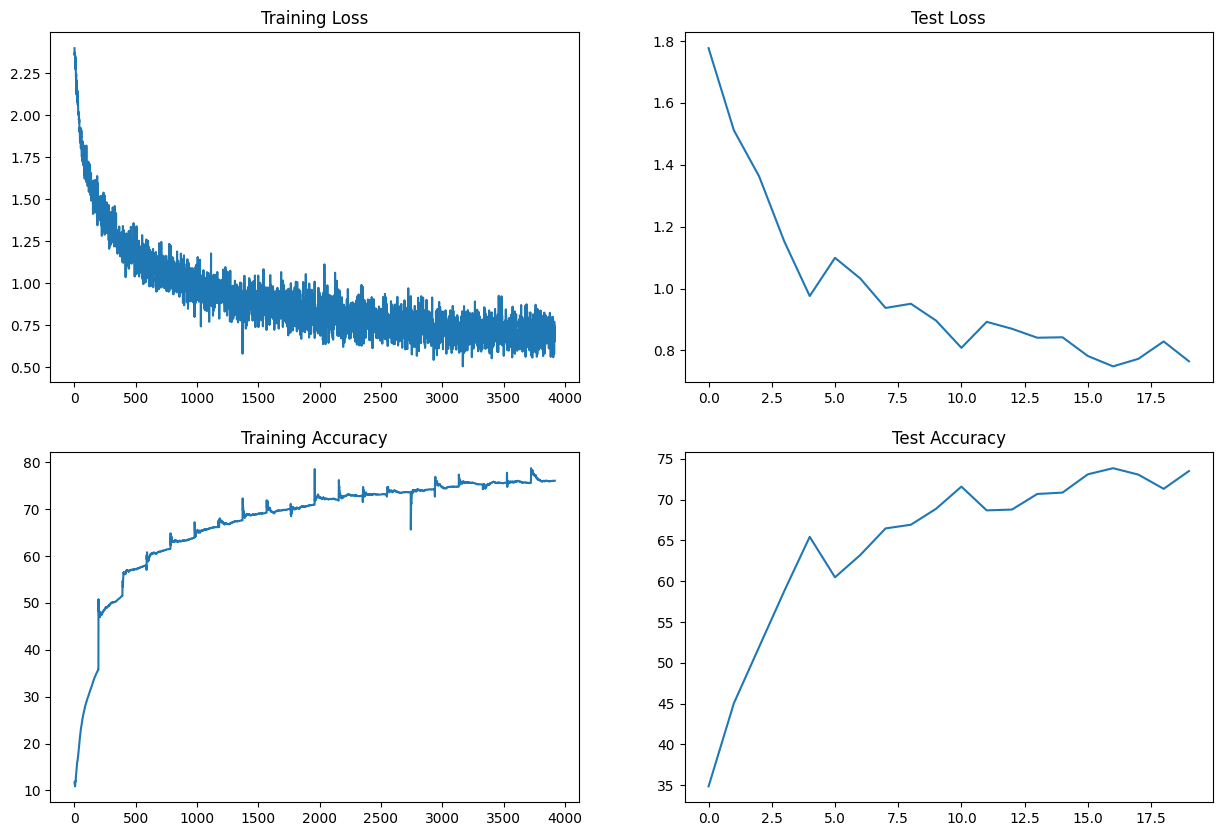

In [68]:
t = [t_items.item() for t_items in train_losses]

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

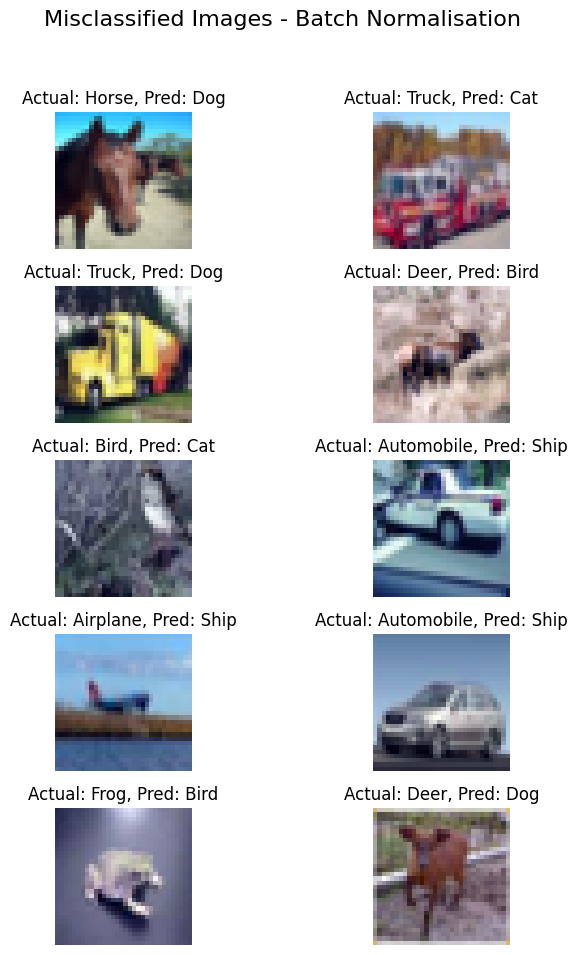

In [69]:
show_misclasses(failed_samples,"Misclassified Images - Batch Normalisation")

In [70]:
Models.evaluate_model(Models.NetB)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
              ReLU-2           [-1, 32, 30, 30]               0
           Dropout-3           [-1, 32, 30, 30]               0
            Conv2d-4           [-1, 16, 30, 30]           4,624
              ReLU-5           [-1, 16, 30, 30]               0
           Dropout-6           [-1, 16, 30, 30]               0
            Conv2d-7           [-1, 16, 30, 30]             272
              ReLU-8           [-1, 16, 30, 30]               0
         MaxPool2d-9           [-1, 16, 15, 15]               0
           Conv2d-10           [-1, 16, 15, 15]           2,320
             ReLU-11           [-1, 16, 15, 15]               0
          Dropout-12           [-1, 16, 15, 15]               0
        LayerNorm-13           [-1, 16, 15, 15]           7,200
           Conv2d-14           [-1, 16,

In [71]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Models.NetB().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=1.9657039642333984 Batch_id=195 Accuracy=16.73%: 100%|██████████| 196/196 [00:15<00:00, 12.72it/s]



Test set: Average loss: 1.9848, Accuracy: 2502/10000 (25.02%)

EPOCH: 1


Loss=1.6147390604019165 Batch_id=195 Accuracy=30.54%: 100%|██████████| 196/196 [00:15<00:00, 12.56it/s]



Test set: Average loss: 1.7091, Accuracy: 3657/10000 (36.57%)

EPOCH: 2


Loss=1.659375786781311 Batch_id=195 Accuracy=37.96%: 100%|██████████| 196/196 [00:16<00:00, 11.96it/s]



Test set: Average loss: 1.5500, Accuracy: 4202/10000 (42.02%)

EPOCH: 3


Loss=1.7129487991333008 Batch_id=195 Accuracy=42.12%: 100%|██████████| 196/196 [00:15<00:00, 12.45it/s]



Test set: Average loss: 1.5112, Accuracy: 4451/10000 (44.51%)

EPOCH: 4


Loss=1.6320106983184814 Batch_id=195 Accuracy=45.80%: 100%|██████████| 196/196 [00:15<00:00, 12.68it/s]



Test set: Average loss: 1.3999, Accuracy: 4777/10000 (47.77%)

EPOCH: 5


Loss=1.5395151376724243 Batch_id=195 Accuracy=48.32%: 100%|██████████| 196/196 [00:15<00:00, 12.35it/s]



Test set: Average loss: 1.3209, Accuracy: 5198/10000 (51.98%)

EPOCH: 6


Loss=1.391200304031372 Batch_id=195 Accuracy=50.91%: 100%|██████████| 196/196 [00:15<00:00, 12.89it/s]



Test set: Average loss: 1.3327, Accuracy: 5094/10000 (50.94%)

EPOCH: 7


Loss=1.040680170059204 Batch_id=195 Accuracy=53.51%: 100%|██████████| 196/196 [00:15<00:00, 12.33it/s]



Test set: Average loss: 1.1735, Accuracy: 5754/10000 (57.54%)

EPOCH: 8


Loss=1.0966618061065674 Batch_id=195 Accuracy=55.82%: 100%|██████████| 196/196 [00:15<00:00, 12.75it/s]



Test set: Average loss: 1.1319, Accuracy: 5925/10000 (59.25%)

EPOCH: 9


Loss=1.3083381652832031 Batch_id=195 Accuracy=57.55%: 100%|██████████| 196/196 [00:15<00:00, 12.26it/s]



Test set: Average loss: 1.0768, Accuracy: 6142/10000 (61.42%)

EPOCH: 10


Loss=1.0734469890594482 Batch_id=195 Accuracy=59.33%: 100%|██████████| 196/196 [00:15<00:00, 12.70it/s]



Test set: Average loss: 1.0525, Accuracy: 6255/10000 (62.55%)

EPOCH: 11


Loss=0.9912287592887878 Batch_id=195 Accuracy=60.79%: 100%|██████████| 196/196 [00:15<00:00, 12.42it/s]



Test set: Average loss: 1.1092, Accuracy: 6098/10000 (60.98%)

EPOCH: 12


Loss=1.2955331802368164 Batch_id=195 Accuracy=62.27%: 100%|██████████| 196/196 [00:15<00:00, 12.92it/s]



Test set: Average loss: 1.0107, Accuracy: 6474/10000 (64.74%)

EPOCH: 13


Loss=1.0753748416900635 Batch_id=195 Accuracy=63.19%: 100%|██████████| 196/196 [00:15<00:00, 12.46it/s]



Test set: Average loss: 1.0009, Accuracy: 6517/10000 (65.17%)

EPOCH: 14


Loss=0.9091726541519165 Batch_id=195 Accuracy=64.06%: 100%|██████████| 196/196 [00:15<00:00, 12.80it/s]



Test set: Average loss: 0.9215, Accuracy: 6737/10000 (67.37%)

EPOCH: 15


Loss=1.0690977573394775 Batch_id=195 Accuracy=65.37%: 100%|██████████| 196/196 [00:16<00:00, 11.70it/s]



Test set: Average loss: 0.9155, Accuracy: 6806/10000 (68.06%)

EPOCH: 16


Loss=0.9002598524093628 Batch_id=195 Accuracy=66.36%: 100%|██████████| 196/196 [00:15<00:00, 12.94it/s]



Test set: Average loss: 0.9029, Accuracy: 6846/10000 (68.46%)

EPOCH: 17


Loss=1.2000411748886108 Batch_id=195 Accuracy=67.35%: 100%|██████████| 196/196 [00:15<00:00, 12.41it/s]



Test set: Average loss: 0.8540, Accuracy: 7018/10000 (70.18%)

EPOCH: 18


Loss=1.1960793733596802 Batch_id=195 Accuracy=67.76%: 100%|██████████| 196/196 [00:15<00:00, 12.90it/s]



Test set: Average loss: 0.8461, Accuracy: 7108/10000 (71.08%)

EPOCH: 19


Loss=1.1329782009124756 Batch_id=195 Accuracy=68.38%: 100%|██████████| 196/196 [00:15<00:00, 12.66it/s]



Test set: Average loss: 0.8682, Accuracy: 7054/10000 (70.54%)



In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Models.NetB().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=1.843387246131897 Batch_id=195 Accuracy=20.62%: 100%|██████████| 196/196 [00:20<00:00,  9.59it/s]



Test set: Average loss: 1.8680, Accuracy: 3177/10000 (31.77%)

EPOCH: 1


Loss=1.626413106918335 Batch_id=195 Accuracy=34.27%: 100%|██████████| 196/196 [00:14<00:00, 13.17it/s]



Test set: Average loss: 1.7703, Accuracy: 3660/10000 (36.60%)

EPOCH: 2


Loss=1.5476640462875366 Batch_id=195 Accuracy=39.81%: 100%|██████████| 196/196 [00:14<00:00, 13.43it/s]



Test set: Average loss: 1.5355, Accuracy: 4479/10000 (44.79%)

EPOCH: 3


Loss=1.508422613143921 Batch_id=195 Accuracy=43.21%: 100%|██████████| 196/196 [00:15<00:00, 12.45it/s]



Test set: Average loss: 1.4590, Accuracy: 4628/10000 (46.28%)

EPOCH: 4


Loss=1.4875954389572144 Batch_id=195 Accuracy=45.77%: 100%|██████████| 196/196 [00:14<00:00, 13.60it/s]



Test set: Average loss: 1.4065, Accuracy: 4910/10000 (49.10%)

EPOCH: 5


Loss=1.5626672506332397 Batch_id=195 Accuracy=48.72%: 100%|██████████| 196/196 [00:14<00:00, 13.22it/s]



Test set: Average loss: 1.4266, Accuracy: 4972/10000 (49.72%)

EPOCH: 6


Loss=1.2637279033660889 Batch_id=195 Accuracy=50.88%: 100%|██████████| 196/196 [00:15<00:00, 12.71it/s]



Test set: Average loss: 1.2971, Accuracy: 5324/10000 (53.24%)

EPOCH: 7


Loss=1.2915856838226318 Batch_id=195 Accuracy=53.22%: 100%|██████████| 196/196 [00:14<00:00, 13.36it/s]



Test set: Average loss: 1.1950, Accuracy: 5725/10000 (57.25%)

EPOCH: 8


Loss=1.1522819995880127 Batch_id=195 Accuracy=54.72%: 100%|██████████| 196/196 [00:14<00:00, 13.48it/s]



Test set: Average loss: 1.1631, Accuracy: 5818/10000 (58.18%)

EPOCH: 9


Loss=1.2160485982894897 Batch_id=195 Accuracy=56.38%: 100%|██████████| 196/196 [00:14<00:00, 13.37it/s]



Test set: Average loss: 1.1397, Accuracy: 5898/10000 (58.98%)

EPOCH: 10


Loss=0.8988696336746216 Batch_id=195 Accuracy=58.56%: 100%|██████████| 196/196 [00:14<00:00, 13.15it/s]



Test set: Average loss: 1.0722, Accuracy: 6197/10000 (61.97%)

EPOCH: 11


Loss=1.1168347597122192 Batch_id=195 Accuracy=59.63%: 100%|██████████| 196/196 [00:15<00:00, 12.29it/s]



Test set: Average loss: 1.0518, Accuracy: 6311/10000 (63.11%)

EPOCH: 12


Loss=1.1079574823379517 Batch_id=195 Accuracy=60.63%: 100%|██████████| 196/196 [00:14<00:00, 13.54it/s]



Test set: Average loss: 1.1215, Accuracy: 6090/10000 (60.90%)

EPOCH: 13


Loss=1.0951980352401733 Batch_id=195 Accuracy=61.81%: 100%|██████████| 196/196 [00:15<00:00, 12.85it/s]



Test set: Average loss: 0.9912, Accuracy: 6459/10000 (64.59%)

EPOCH: 14


Loss=1.1170270442962646 Batch_id=86 Accuracy=62.35%:  44%|████▍     | 87/196 [00:06<00:07, 15.12it/s]

Text(0.5, 1.0, 'Test Accuracy')

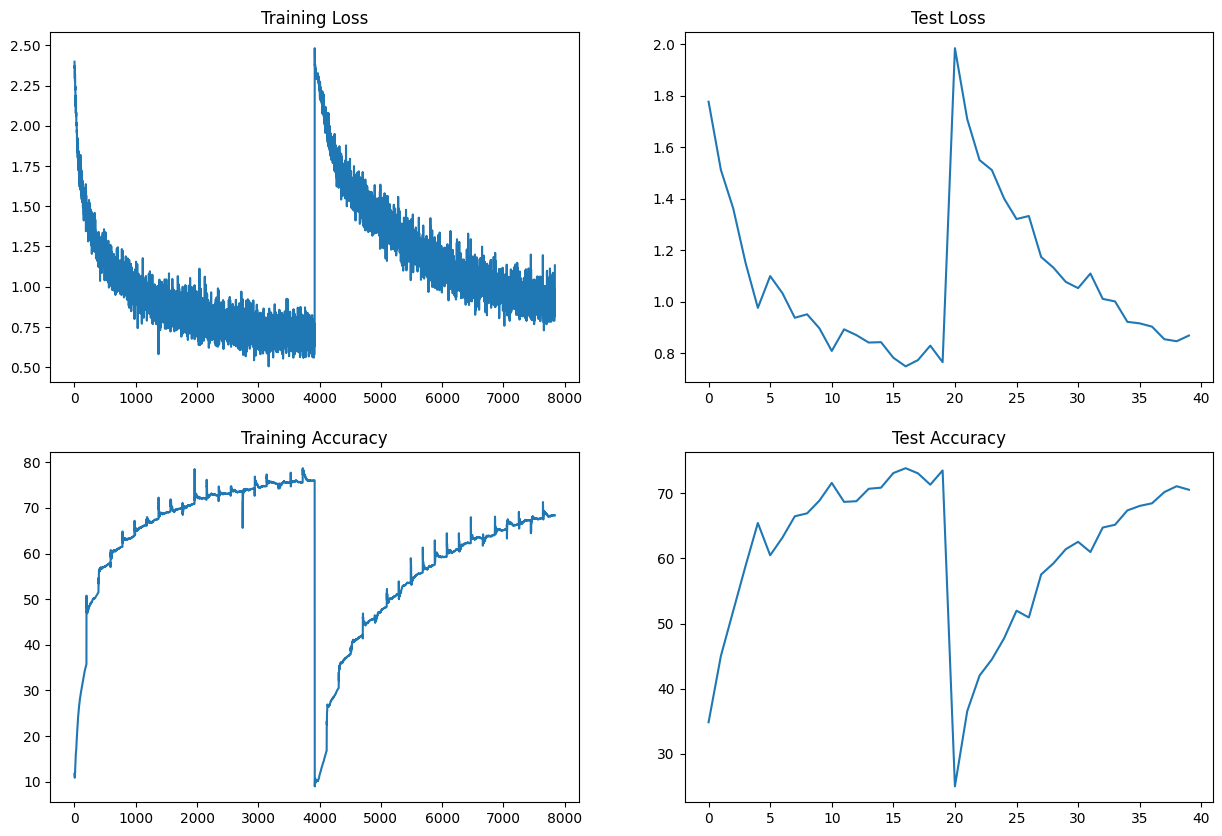

In [72]:
t = [t_items.item() for t_items in train_losses]

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

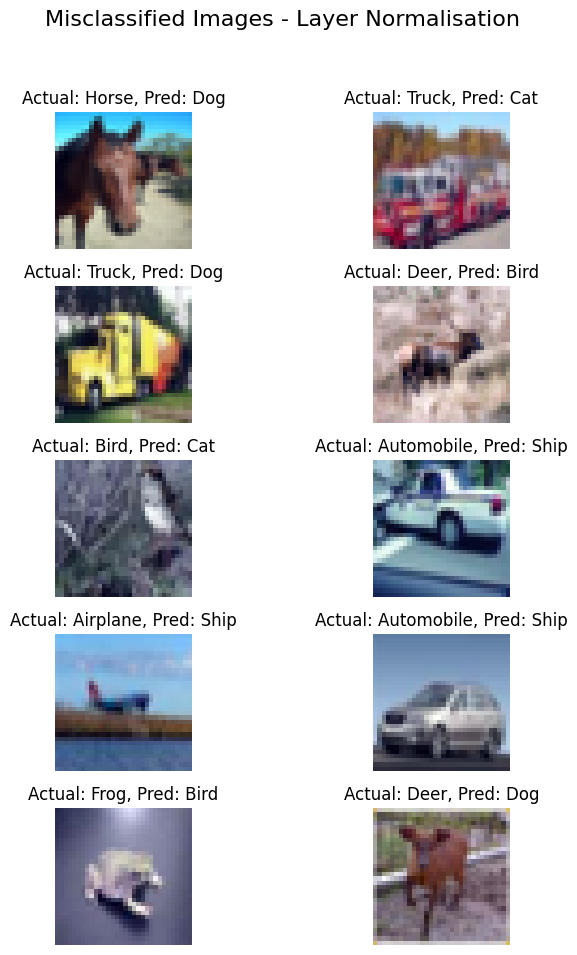

In [73]:
show_misclasses(failed_samples,"Misclassified Images - Layer Normalisation")